In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Creating a data analysis pipeline: chemiluminescence of bleach

It's common to have a set of data files that all need to be analyzed in the same manner. If you have two data sets, doing them by hand might be easy. At ten, it gets repetative. But by 100 or 1000 you need to find ways to automate as much of the analysis as possible. The process of analyzing a large number of similar datasets is called a data analysis pipeline. In this module, you'll learn some skills to help you begin to automate your own data analysis and create a pipline.

The sample dataset here is chemiluminesnce of bleach. Experimentally, solutions of bleach are combined with luminol and peroxide at varying concentrations. The resulting chemilumenesce is recorded over time. Each data set shows an initial fast rise due to the combination of the samples, then a slow decay. That decay trace can be analyzed to understand the kinetics of the reaction. The first step in the analysis is to fit each dataset to a decaying exponential and extract fit parameters.

This analysis is split into two files. This file is the first one, showing you how to fit one dataset in a way that makes repeated fitting easy. If you're familiar with fitting you can skip straight to the second, which shows you a few ways to put together your analysis pipline.

Skills in this notebook:
 - [ ] Importing the first data set
 - [ ] Trimming the data
   - [ ] Finding the peaks
   - [ ] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
 - [ ] Fitting the data and printing out the fit parameters

Skills in the next notebook:



# Analyzing the first data file

The following steps will be followed in this notebook:
 - [ ] Importing the first data set
 - [ ] Trimming the data
   - [ ] Finding the peaks
   - [ ] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
   - [ ] Define the fit function
   - [ ] Pick reasonable initial guess parameters
 - [ ] Fitting the data and printing out the fit parameters



## Importing the data set

We'll start by analyzing the datafile "bleach/A_CL_T2.csv". To import the datafile, we'll use `np.loadtxt()`. However, the datafiles from the instrument contain **a lot** of metadata. Start by opening up the raw file to look at the structure. You can do that by clicking on your datafile in the Jupyter navigation window, and it'll open in your web browser. When you look at the file, notice that there is metadata (data about the data, which tells you about the way the data was acquired) above the experimental data, as well as on both sides. You'll need to use some key-word arguments (kwargs) in your call to `np.loadtxt()` in order to skip the metadata. Here are some you might find useful:

 - `skiprows` lets you ignore rows above your data. You'll need to set it equal to the number of rows you want to skip before your data starts.
 - `usecols` selects the columns your data is in, ignoring all other columns. This is zero-indexed.
 - `unpack = True` splits columns into individual arrays: `xArray, yArray = np.loadtxt("filename.csv", unpack = True)`
 - `delimiter` lets you set the delimiter, which is the character separating each data point. For a csv file, the delimiter is a comma.

In the first cell below, figure out how to import your data. In the second cell, plot your data, so that you know what you're working with. The array names are written in the first cell for you.

In [2]:
dataX_raw, dataY_raw = np.loadtxt("bleach/A_CL_T2.csv", skiprows = 21, usecols = (2,3), delimiter = ',', unpack = True)

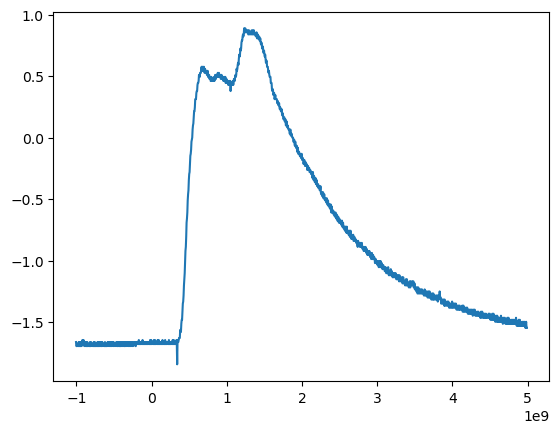

In [3]:
plt.plot(dataX_raw, dataY_raw)

## Trimming the data

 - [x] Importing the first data set
 - [ ] Trimming the data
   - [ ] Finding the peaks
   - [ ] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
   - [ ] Define the fit function
   - [ ] Pick reasonable initial guess parameters
 - [ ] Fitting the data and printing out the fit parameters

The dataset contains an initial baseline, a rise with some odd shapes owing to the injection, and the the exponential decay which is the part that we're interested in. 

Throughout this section, you'll be using a lot of array slicing, which means selecting just parts of an array. You can read a lot more about array slicing here: https://numpy.org/doc/stable/user/basics.indexing.html You might find the Basic Indexing section particularly useful.

We could manually slice the array to select just the exponential decay. However, we're fitting with an eye towards automation, so it makes sense to find a way to automate the slice location. In this case, we'll use the scipy function `find_peaks()`. This function searches for all peaks in a data set, allowing for several useful kwargs. Three you should consider are `height`, `distance`, and `prominance`. Call `help(find_peaks)` in a blank cell to learn what these three kwargs do.

In [7]:
# This cell is so that you can call help on find_peaks

Next you're going to edit the cell below. It currently has five lines of code:
1. Find the index (location) of each peak and it's height and save them in arrays
2. Grab out the X values corresponding to each peak and save them in an array (this is a fancy array slice)
3. Grab out the Y values corresponding to each peak and save them in an array (another fancy array slice)
4. Plot the raw data
5. Plot the peak locations

The call to `find_peaks()` has no kwargs. Excecute that cell. It'll have a multitude of red dots on your data. Your job is to adjust the height, distance, and/or prominence. You'd like it to find just a few peaks, with the last one occuring close to the start of the decay.

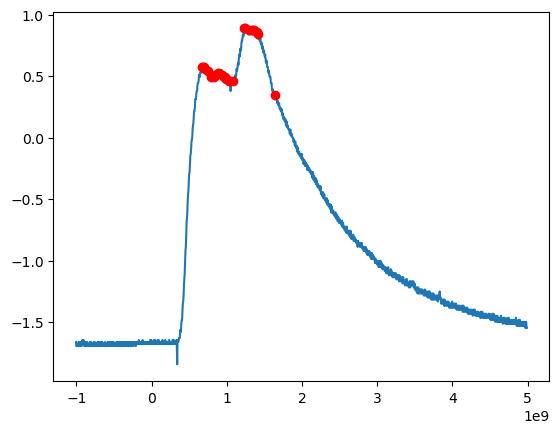

In [4]:
peaks, heights = find_peaks(dataY_raw, height = 0.25, prominence = .02)
peakX = dataX_raw[peaks]
peakY = dataY_raw[peaks]


# plot the peaks
plt.plot(dataX_raw, dataY_raw)
plt.plot(peakX, peakY, 'or')

 - [x] Importing the first data set
 - [ ] Trimming the data
   - [x] Finding the peaks
   - [ ] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
   - [ ] Define the fit function
   - [ ] Pick reasonable initial guess parameters
 - [ ] Fitting the data and printing out the fit parameters


Now that you know where the peaks our, we can use that information to slice the data. We just want to fit the exponential decay. This should occur after the last peak you found. I've given you three cells below to do this step in.

In the first cell, use an array slice to grab out the index of the last peak and save it as a variable with a useful name. Hint: while indices greater than zero count from the beginning of the array, indices less than zero count backwards from the end. So an index of -1 is the last element, while -2 is the second to last.

In the second cell, you're going to slice your `dataX_raw` and `dataY_raw`. The slice should start at your peak index and end at the end of the array. Save each to a new array, `dataX` and `dataY`.

In the third cell, plot your new arrays. When you're done, verify that you've identified just the decay region. Otherwise, go back through and figure out what you need to adjust.

In [5]:
last_peak_index = peaks[-1]

In [6]:
dataX = dataX_raw[last_peak_index:]  # x values after the last peak
dataY = dataY_raw[last_peak_index:]  # y values after the last peak


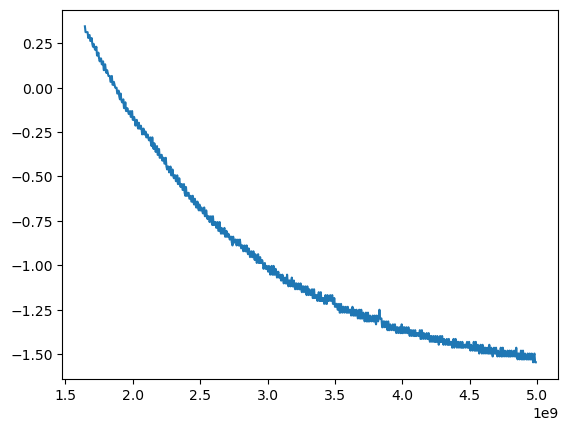

In [7]:
plt.plot(dataX, dataY)

## Setting up the fit and finding the initial guess

 - [x] Importing the first data set
 - [x] Trimming the data
   - [x] Finding the peaks
   - [x] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
   - [ ] Define the fit function
   - [ ] Pick reasonable initial guess parameters
 - [ ] Fitting the data and printing out the fit parameters

In order to be ready to fit, we need two things: the fit function and an initial guess. First, create a function (you can call it `exponential`). This function should take four arguments: $x$, $a$, $k$, and $b$, and then return:

$y = a e^{-kx} + b$

If you need more information on writing functions, check out this page from the Python tutorial: https://docs.python.org/3/tutorial/controlflow.html#defining-functions


In [8]:
def exponential(x, a, k, b):
    return a*np.exp(-k*x) + b

 - [x] Importing the first data set
 - [x] Trimming the data
   - [x] Finding the peaks
   - [x] Slice both arrays after the last peak
 - [ ] Setting up the fit and finding the initial guess
   - [x] Define the fit function
   - [ ] Pick reasonable initial guess parameters
 - [ ] Fitting the data and printing out the fit parameters

We'll be using the least squares fitting function `curve_fit()` from Scipy. While this is a robust fitting function, it can run into trouble that is often negated by having reasonable initial parameters. We're going to work out estimates for each parameter that are close (relative to the range of All Possible Numbers) to make it more likely that `curve_fit()` finds an acceptable answer.

$a$ relates to the height of the exponential function at x = 0. One way to estimate it would be to set the guess for $a$ to be the height of the peak we found.

$b$ is the value of the decay at long times. An easy estimate is to use the last value of the Y value array.

$k$ is the characteristic decay time. We can consider that, if we take the natural log of our data, then $k$ becomes the slope of the data. This means that we can estimate $k$ by calculating the slope of that line. Two convenient points for the slope calculation are the last value of your dataX and dataY arrays, and the X and Y coordinates of the peak you found. The natural logarithim is `np.log()`.

The cell below contains a skeleton for you to fill in your initial guesses. When complete, it should plot your experimental data in blue, followed by the initial guess of the decay in orange. Your initial guess line doesn't have to be terribly close to the data - remember that you're trying to narrow it down from "All possible values of all three parameters" to "The real value should be within an order of magnitude or two fo this number".

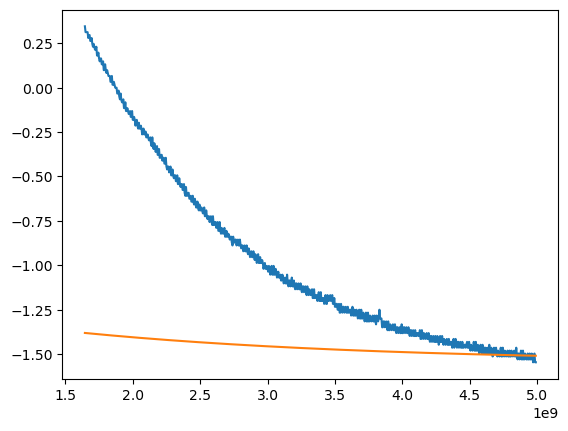

In [9]:
plt.plot(dataX, dataY)
A_guess = peakY[-1]  # Height of the last peak
B_guess = dataY[-1]  # Approximation of the asymptote

k_guess = np.log(abs(dataY[-1]/peakY[-1])) / (dataX[-1] - peakX[-1])  

p0 = (A_guess, k_guess, B_guess)
plt.plot(dataX, exponential(dataX, *p0))

## Fitting the data and printing out the fit parameters

 - [x] Importing the first data set
 - [x] Trimming the data
   - [x] Finding the peaks
   - [x] Slice both arrays after the last peak
 - [x] Setting up the fit and finding the initial guess
 - [ ] Fitting the data and printing out the fit parameters

Once you have your initial parameters, it's time to fit your data. You'll use `curve_fit()` from scipy. Call the help on `curve_fit()` to work out how to use it, then fit your data. Save the optimized parameters and covarience matrix as `popt` and `pcov`. Finally, plot your raw data and your fitted da

In [13]:
popt, pcov, infodict, mesg, ier = curve_fit(exponential, dataX, dataY, p0 = p0, full_output=True)

In [15]:
mesg

'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'

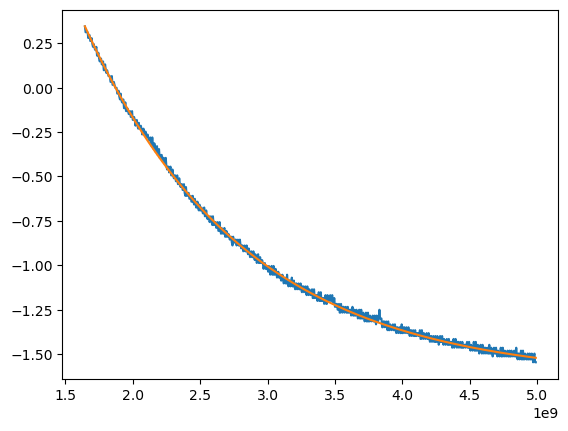

In [19]:
plt.plot(dataX, dataY)
plt.plot(dataX, exponential(dataX, *popt))

In [29]:
# Print out the paramters here
print(f"The value of a is {popt[0]:.2f}. The value of k is {popt[1]:.2e}. The value of b is {popt[2]:.2f}")

print(f"This print statement is here to show you how to print output with two digits after the decimal {popt[0]:.2f}.")
print(f"This one shows you how to print scientific notation with 3 decimal precision {popt[1]:.3e}")


The value of a is 7.95. The value of k is 8.43e-10. The value of b is -1.64
This print statement is here to show you how to print output with two digits after the decimal 7.95.
This one shows you how to print scientific notation with 3 decimal precision 8.433e-10


Alright you're done. Review!

 - [x] Importing the first data set
 - [x] Trimming the data
   - [x] Finding the peaks
   - [x] Slice both arrays after the last peak
 - [x] Setting up the fit and finding the initial guess
 - [x] Fitting the data and printing out the fit parameters